In [2]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
#Data set up
#y data
raw_data = pd.read_table('dados1.txt', header=None)
y_data = pd.read_table('dados1.txt', header = None, names=['y'], skiprows=3, skipfooter=104, engine='python')
label = np.array(y_data['y'])

#x data
x_data = pd.read_table('dados1.txt', header = None, names=['x1','x2','x3'], delim_whitespace = True, skiprows=108)
x1 = np.array(x_data['x1'])
x2 = np.array(x_data['x2'])
x3 = np.array(x_data['x3'])

x_data = [(vx1, vx2, vx3) for vx1, vx2, vx3 in zip(x1, x2, x1)]
x_data = np.array(x_data)

In [8]:
len(x_data)

100

In [5]:
x_data[0]

array([ 2.7712976,  2.1672857,  2.7712976])

In [6]:
len(x_data)

100

In [81]:
def perceptron(x_data, label, bias, lr):

    w = np.zeros(len(x_data[0]))
    w_temp = np.append(bias, w)
   
    for k in range (0, len(x_data)-1):
        w = w_temp
        x_temp = np.append(1, x_data[k])

        #y_temp is the dot product between w_temp and x_temp
        y_temp = np.sign(np.dot(w,x_temp))
       
        if y_temp == label[k]:
            w_out = w
        else:
            w_out = w - lr*(label[k] - y_temp)*x_temp
    
        w_temp = w_out
        
    return w_out

In [82]:
weights_vector = perceptron(x_data, label, 0.5 ,0.2)

In [83]:
#plane: ax + by + cz + d = 0
#weights_vector format: [d, a, b, c]
#the normal vector is (a, b, c) 
weights_vector

array([  4.1       , -74.55037987, -78.08213068, -74.55037987])

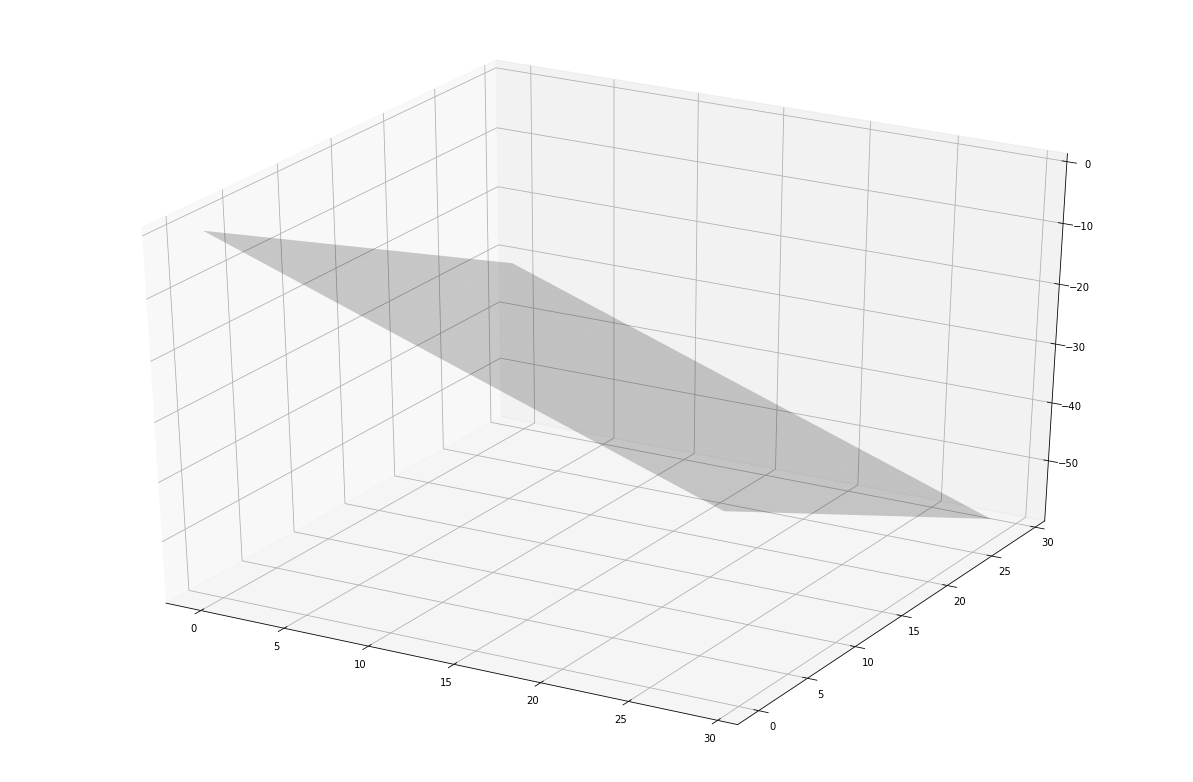

In [85]:
#plane: ax + by + cz + d = 0
#weights_vector format: [d, a, b, c]
#the normal vector: (a, b, c) 
#the point (x, 0, 0) = (-d/a, 0, 0) is in the plane

x = -(weights_vector[0]/weights_vector[1])
point = np.append(x, np.zeros(2))
normal = weights_vector[1:]
d = -np.sum(point*normal)# dot product

# create x,y
xx, yy = np.meshgrid(range(30), range(30))

# calculate corresponding z
z = (-normal[0]*xx - normal[1]*yy - d)*1./normal[2]

# plot the surface
plt3d = plt.figure(figsize=(21, 14)).gca(projection='3d')
plt3d.plot_surface(xx,yy,z, color='black', alpha=0.2)
plt.show()


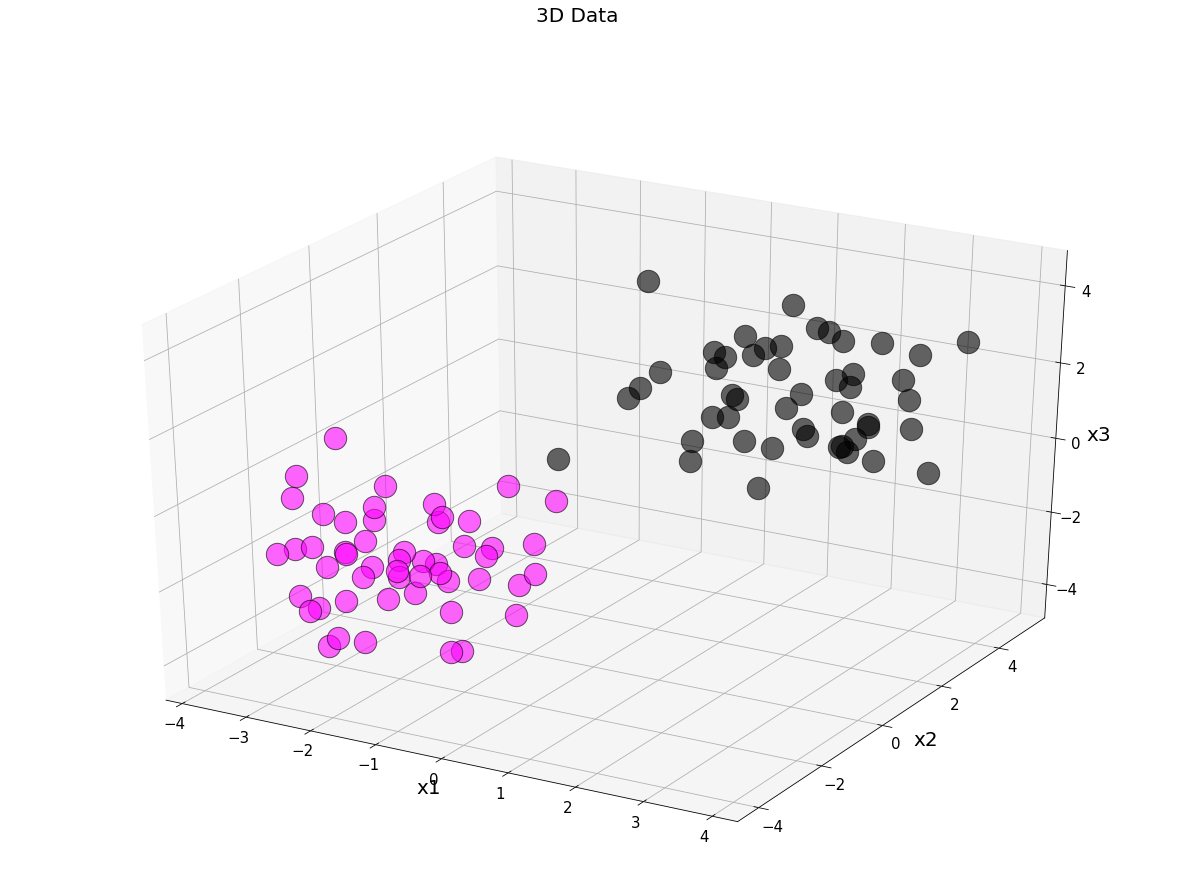

In [94]:
#Plotting the data

fig = plt.figure(figsize=(21, 14))
t = fig.suptitle('3D Data', fontsize=20)
ax = fig.add_subplot(111, projection='3d') 

#data_points: zipped points with the three coordinates together. Ex.: (1,-5,-2)
data_points = [(vx1, vx2, vx3) for vx1, vx2, vx3 in zip(x1, x2, x3)]
colors = ['magenta' if ylabel == -1 else 'black' for ylabel in label]

#iterations by the points (data_points vector)
for data, color in zip(data_points, colors):
    coordx1, coordx2, coordx3 = data
    ax.scatter(coordx1, coordx2, coordx3, alpha=0.6, c=color, edgecolors='none', s=500)


ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

ax.set_xlabel('x1',fontsize='20')
ax.set_ylabel('x2',fontsize='20')
ax.set_zlabel('x3',fontsize='20')


plt.show()

In [111]:
data_points = [(vx1, vx2) for vx1, vx2 in zip(x1, x2)]
type(data_points)

list

In [112]:
data_points_array = np.asarray(data_points, dtype=np.float32)

In [116]:
data_points_array[0:5]

array([[ 2.77129769,  2.16728568],
       [ 2.26120448,  1.96286082],
       [ 2.2434628 ,  0.8722102 ],
       [-2.91514587, -1.78967452],
       [-0.15655848, -4.00189686]], dtype=float32)

In [117]:
data_points_array[0:5][:,1]

array([ 2.16728568,  1.96286082,  0.8722102 , -1.78967452, -4.00189686], dtype=float32)

In [120]:
xxteste, yyteste = np.meshgrid(data_points_array[:,0], data_points_array[:,1])

In [121]:
xxteste

array([[ 2.77129769,  2.26120448,  2.2434628 , ..., -1.43560648,
        -2.03615189,  2.25459218],
       [ 2.77129769,  2.26120448,  2.2434628 , ..., -1.43560648,
        -2.03615189,  2.25459218],
       [ 2.77129769,  2.26120448,  2.2434628 , ..., -1.43560648,
        -2.03615189,  2.25459218],
       ..., 
       [ 2.77129769,  2.26120448,  2.2434628 , ..., -1.43560648,
        -2.03615189,  2.25459218],
       [ 2.77129769,  2.26120448,  2.2434628 , ..., -1.43560648,
        -2.03615189,  2.25459218],
       [ 2.77129769,  2.26120448,  2.2434628 , ..., -1.43560648,
        -2.03615189,  2.25459218]])

In [100]:
xx[0:3]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [101]:
data_points[0]

(2.7712976, 2.1672857000000003, 2.4362741000000003)

/home/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


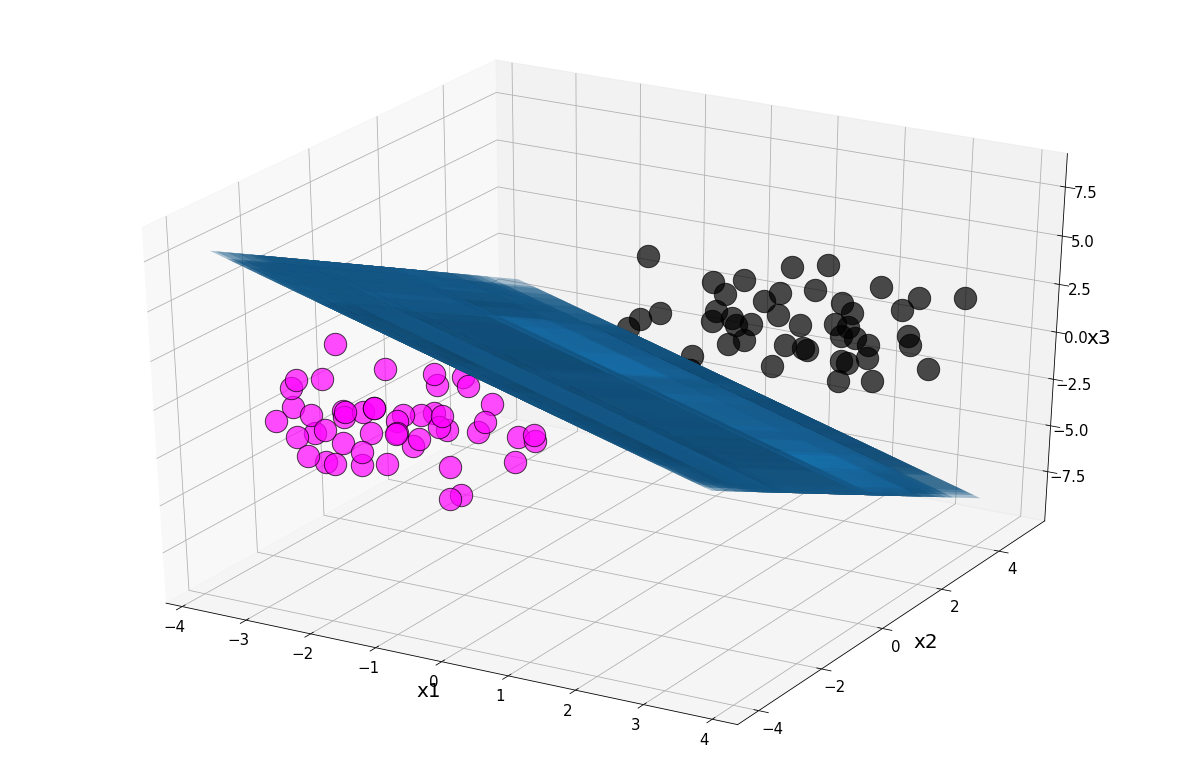

In [135]:
x = -(weights_vector[0]/weights_vector[1])
point = np.append(x, np.zeros(2))
normal = weights_vector[1:]
d = -np.sum(point*normal)# dot product

# create x,y
data_points = [(vx1, vx2) for vx1, vx2 in zip(x1, x2)]
data_points_array = np.asarray(data_points, dtype=np.float32)
xx, yy = np.meshgrid(data_points_array[:,0], data_points_array[:,1])

# calculate corresponding z
z = (-normal[0]*xx - normal[1]*yy - d)*1./normal[2]

# plot the surface
plt3d = plt.figure(figsize=(21, 14)).gca(projection='3d')
#t = fig.suptitle('3D Data', fontsize=20) #title
plt3d.plot_surface(xx,yy,z, alpha=0.1)
#plt3d.plot_surface(xx,yy,z, color='black', alpha=0.2)

ax = plt.gca()
ax.hold(True)

#data_points: zipped points with the three coordinates together. Ex.: (1,-5,-2)
data_points = [(vx1, vx2, vx3) for vx1, vx2, vx3 in zip(x1, x2, x3)]
colors = ['magenta' if ylabel == -1 else 'black' for ylabel in label]

#iterations by the points (data_points vector)
for data, color in zip(data_points, colors):
    coordx1, coordx2, coordx3 = data
    ax.scatter(coordx1, coordx2, coordx3, alpha=0.7, c=color, edgecolors='none', s=500)


ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

ax.set_xlabel('x1',fontsize='20')
ax.set_ylabel('x2',fontsize='20')
ax.set_zlabel('x3',fontsize='20')


plt.show()
